In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
pd.options.display.max_rows = 10
sns.set(context='notebook', rc={'figure.figsize': (8, 5)})

In [2]:
country = 'Australia'

In [3]:
# CSV from https://ourworldindata.org/coronavirus-source-data
# Direct download: https://covid.ourworldindata.org/data/full_data.csv
df = pd.read_csv('full_data.csv', parse_dates=[0])
df

,date,location,new_cases,new_deaths,total_cases,total_deaths
0,2020-02-25,Afghanistan,NaN,NaN,1,NaN
1,2020-02-26,Afghanistan,0.0,NaN,1,NaN
2,2020-02-27,Afghanistan,0.0,NaN,1,NaN
3,2020-02-28,Afghanistan,0.0,NaN,1,NaN
4,2020-02-29,Afghanistan,0.0,NaN,1,NaN
...,...,...,...,...,...,...
2548,2020-03-11,World,4611.0,275.0,118319,4292.0
2549,2020-03-12,World,6936.0,317.0,125260,4613.0
2550,2020-03-13,World,7488.0,338.0,132758,4956.0
2551,2020-03-14,World,9766.0,434.0,142539,5393.0


In [4]:
# Grab the comparison country, get the latest record
comparison = df[df['location'] == country]
comparison_current = comparison.iloc[-1]
comparison_current

date            2020-03-15 00:00:00
location                  Australia
new_cases                        52
new_deaths                        0
total_cases                     249
total_deaths                      3
Name: 137, dtype: object

In [5]:
# Get the data point where Italy was closest to the comparison country's total number of cases
italy = df[(df['location'] == 'Italy')].reset_index(drop=True)
idx = italy['total_cases'].sub(comparison_current.total_cases).abs().idxmin()
italy_same_as_current = italy.iloc[idx]
italy_same_as_current

date            2020-02-25 00:00:00
location                      Italy
new_cases                       105
new_deaths                        4
total_cases                     229
total_deaths                      6
Name: 25, dtype: object

In [6]:
# How many days behind is the comparison country?
days_behind = comparison_current.date - italy_same_as_current.date
days_behind

Timedelta('19 days 00:00:00')

In [7]:
print(f'{country} has {comparison_current.total_cases} cases, '
      f'closest to Italy {days_behind.days} days ago with {italy_same_as_current.total_cases} cases')

Australia has 249 cases, closest to Italy 19 days ago with 229 cases


In [8]:
# Copy the Italy dataset, and shift it backwards in time based on the above offset
italy_leading = italy.copy()
italy_leading.date += days_behind
italy_leading

,date,location,new_cases,new_deaths,total_cases,total_deaths
0,2020-02-19,Italy,NaN,NaN,2,NaN
1,2020-02-20,Italy,0.0,NaN,2,NaN
2,2020-02-21,Italy,0.0,NaN,2,NaN
3,2020-02-22,Italy,0.0,NaN,2,NaN
4,2020-02-23,Italy,0.0,NaN,2,NaN
...,...,...,...,...,...,...
40,2020-03-30,Italy,977.0,168.0,10149,631.0
41,2020-03-31,Italy,2313.0,196.0,12462,827.0
42,2020-04-01,Italy,2651.0,189.0,15113,1016.0
43,2020-04-02,Italy,2547.0,252.0,17660,1268.0


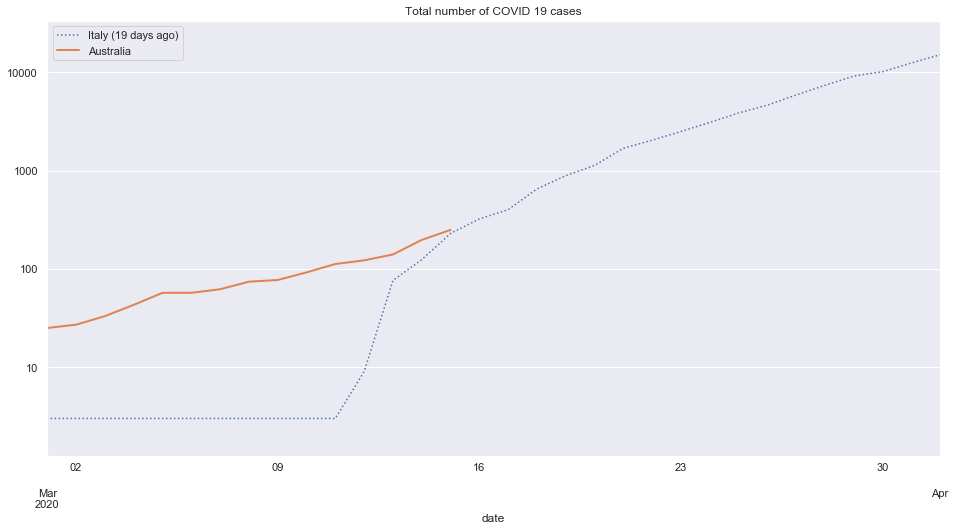

In [9]:
# Plot the offset graph of Italy (log)
ax = italy_leading.plot(
    x='date',
    y='total_cases',
    label=f'Italy ({days_behind.days} days ago)',
    figsize=(16, 8),
    ls=':',
    logy=True
)
# Plot the comparison country
comparison.plot(x='date', y='total_cases', ax=ax, label=country, lw=2)

# Fix the graph start and end date
ax.set_xlim(datetime.date(2020, 3, 1), datetime.date(2020, 4, 1))
ax.set_title('Total number of COVID 19 cases')
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, y: int(x)))


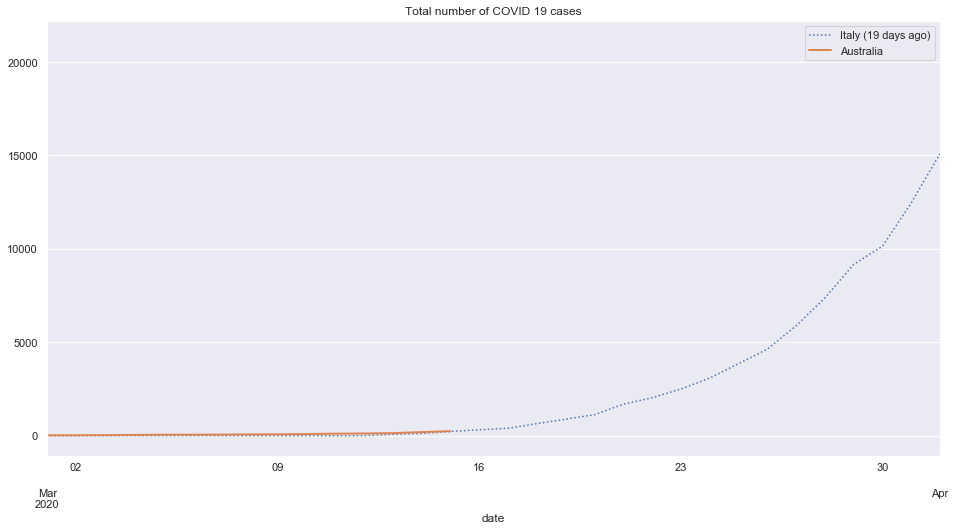

In [10]:
# Plot the offset graph of Italy (linear)
ax = italy_leading.plot(
    x='date',
    y='total_cases',
    label=f'Italy ({days_behind.days} days ago)',
    figsize=(16, 8),
    ls=':',
    logy=False
)
# Plot the comparison country
comparison.plot(x='date', y='total_cases', ax=ax, label=country, lw=2)

# Fix the graph start and end date
ax.set_xlim(datetime.date(2020, 3, 1), datetime.date(2020, 4, 1))
ax.set_title('Total number of COVID 19 cases')
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, y: int(x)))
